<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/MNISTLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
train = pd.read_csv("/content/drive/MyDrive/ML/Classification_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML/Classification_test.csv")

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(30000, 785)

In [ ]:
train.shape

(30000, 785)

In [ ]:
test.head()

,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,15795,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11964,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11284,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 2(Working)

In [8]:
D0=train.copy();D1=train.copy();D2=train.copy();D3=train.copy();D4=train.copy();D5=train.copy();D6=train.copy();D7=train.copy();D8=train.copy();D9=train.copy();


In [9]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

The required digit turns into 1 rest turns into 0

One-Hot Encoding

In [10]:
for i in range(10):
  datasets[i]['Target'] = (datasets[i]['label'] == i).astype(int)
  datasets[i].drop(columns=['label'], inplace=True)

In [11]:
x_test= test.iloc[:, range(1,785)].values
y_test=test['ID']

In [12]:
def sigmoid(z):

    s = 1.0 / (1.0 + np.exp(-z))

    return s

In [13]:
def cost_and_gradient_function(w, b, X, Y):

    m = X.shape[1]

    z = np.dot(w.T,X)+b
    f = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(f)+(1.0-Y)*np.log(1.0-f))

    dj_dw = 1.0/m*np.dot(X, (f-Y).T)
    dj_db = 1.0/m*np.sum(f-Y)

    assert (dj_dw.shape == w.shape)
    assert (dj_db.dtype == float)

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    return dj_dw,dj_db, cost

In [14]:
def gradient_descent(w, b, X, Y, num_iterations, alpha, print_cost = False):

    J_history = []

    for i in range(num_iterations):

        dj_dw,dj_db, cost = cost_and_gradient_function(w, b, X, Y)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if i % 100 == 0:
            J_history.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))

    return w,b, dj_dw,dj_db, J_history

In [15]:
def predict (w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)

    f = sigmoid (np.dot(w.T, X)+b)

    for i in range(f.shape[1]):
        if (f[:,i] > 0.5):
            Y_prediction[:, i] = 1
        elif (f[:,i] <= 0.5):
            Y_prediction[:, i] = 0

    assert (Y_prediction.shape == (1,m))

    return Y_prediction

In [26]:
def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, alpha = 0.5, print_cost = False):

    w = np.zeros((X_train.shape[0],1))
    b = 0
    w, b, dj_dw,dj_db, J_history = gradient_descent(w, b, X_train, Y_train, num_iterations, alpha, print_cost)

    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)

    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)

    d = {"costs": J_history,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "alpha": alpha,
         "num_iterations": num_iterations}

    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)



    return d,test_accuracy

In [17]:
TrainTest_datadict={}

for i in range(10):
  x=datasets[i].iloc[:,:784]
  y=datasets[i].iloc[:,-1]
  y=np.array([y])
  TrainTest_datadict['D'+str(i)]=[x,y]

In [140]:
models_list=[]
accuracy_list=[]

For dataset 0
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.106136
Cost (iteration 200) = 0.083124
Cost (iteration 300) = 0.072350
Cost (iteration 400) = 0.065707
Cost (iteration 500) = 0.061079
Cost (iteration 600) = 0.057616
Cost (iteration 700) = 0.054899
Cost (iteration 800) = 0.052694
Cost (iteration 900) = 0.050858
Accuarcy Test:  98.68333333333334
Accuracy Train:  98.73333333333333


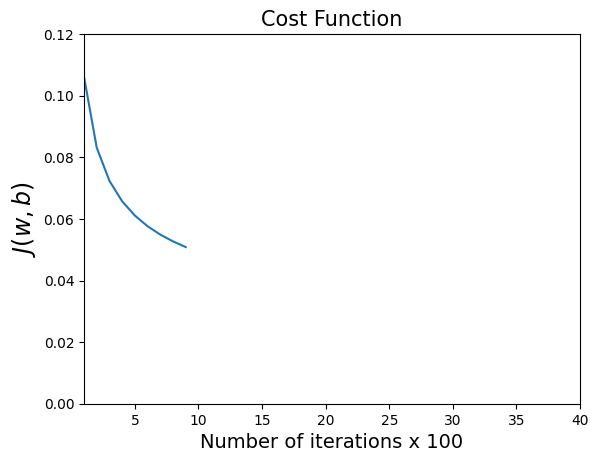

For dataset 1
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.075583
Cost (iteration 200) = 0.055345
Cost (iteration 300) = 0.046754
Cost (iteration 400) = 0.041755
Cost (iteration 500) = 0.038392
Cost (iteration 600) = 0.035927
Cost (iteration 700) = 0.034019
Cost (iteration 800) = 0.032481
Cost (iteration 900) = 0.031207
Accuarcy Test:  99.21666666666667
Accuracy Train:  99.21666666666667


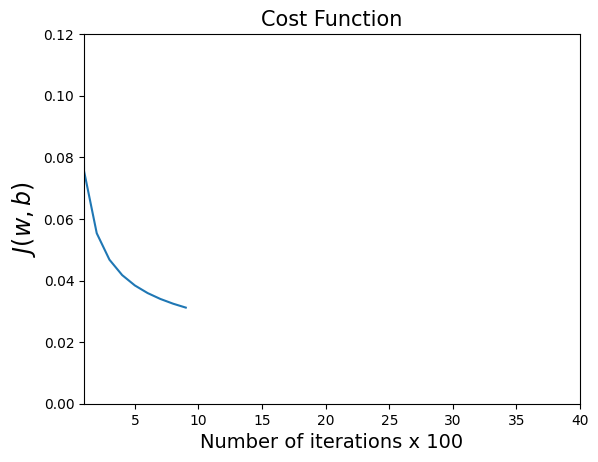

For dataset 2
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.050308
Cost (iteration 200) = 0.034452
Cost (iteration 300) = 0.027854
Cost (iteration 400) = 0.024067
Cost (iteration 500) = 0.021546
Cost (iteration 600) = 0.019715
Cost (iteration 700) = 0.018310
Cost (iteration 800) = 0.017187
Cost (iteration 900) = 0.016264
Accuarcy Test:  99.8
Accuracy Train:  99.74166666666666


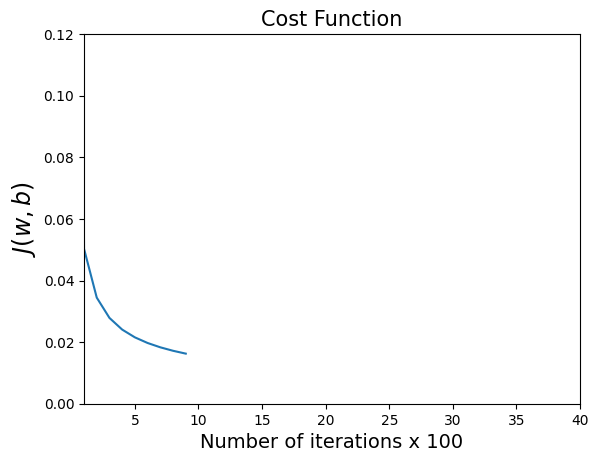

For dataset 3
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.116159
Cost (iteration 200) = 0.094638
Cost (iteration 300) = 0.085541
Cost (iteration 400) = 0.080228
Cost (iteration 500) = 0.076631
Cost (iteration 600) = 0.073982
Cost (iteration 700) = 0.071920
Cost (iteration 800) = 0.070252
Cost (iteration 900) = 0.068863
Accuarcy Test:  97.88333333333334
Accuracy Train:  98.0


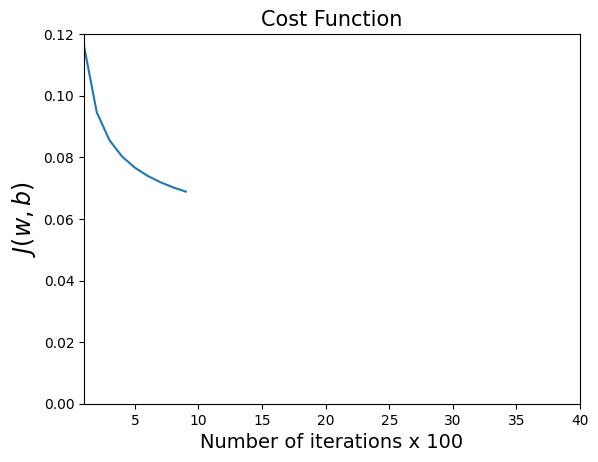

For dataset 4
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.084347
Cost (iteration 200) = 0.063927
Cost (iteration 300) = 0.055399
Cost (iteration 400) = 0.050420
Cost (iteration 500) = 0.047050
Cost (iteration 600) = 0.044570
Cost (iteration 700) = 0.042645
Cost (iteration 800) = 0.041093
Cost (iteration 900) = 0.039807
Accuarcy Test:  98.7
Accuracy Train:  98.82083333333334


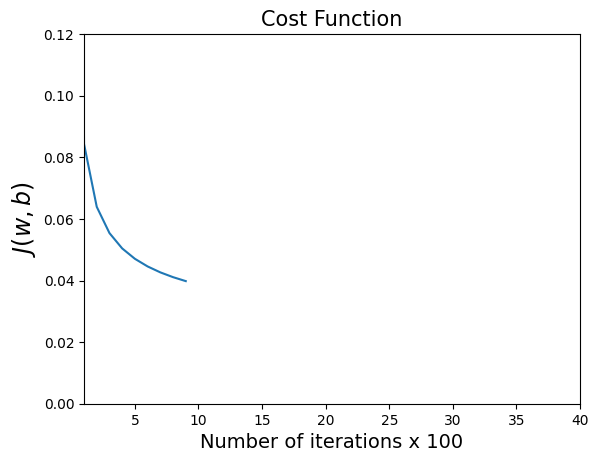

For dataset 5
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.117224
Cost (iteration 200) = 0.088866
Cost (iteration 300) = 0.076540
Cost (iteration 400) = 0.069196
Cost (iteration 500) = 0.064142
Cost (iteration 600) = 0.060362
Cost (iteration 700) = 0.057379
Cost (iteration 800) = 0.054936
Cost (iteration 900) = 0.052880
Accuarcy Test:  98.21666666666667
Accuracy Train:  98.4125


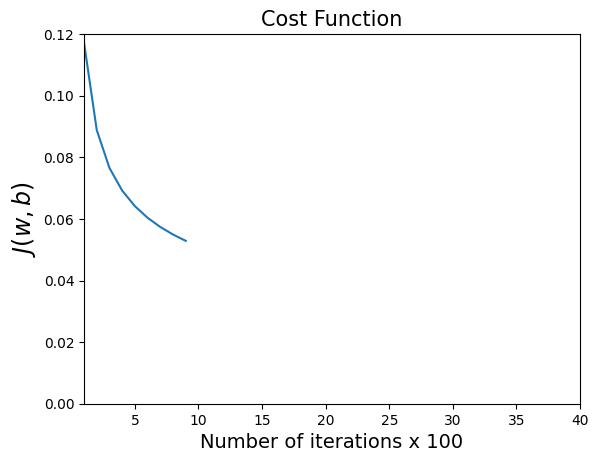

For dataset 6
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.087416
Cost (iteration 200) = 0.069524
Cost (iteration 300) = 0.061380
Cost (iteration 400) = 0.056555
Cost (iteration 500) = 0.053290
Cost (iteration 600) = 0.050896
Cost (iteration 700) = 0.049043
Cost (iteration 800) = 0.047552
Cost (iteration 900) = 0.046318
Accuarcy Test:  98.71666666666667
Accuracy Train:  98.70416666666667


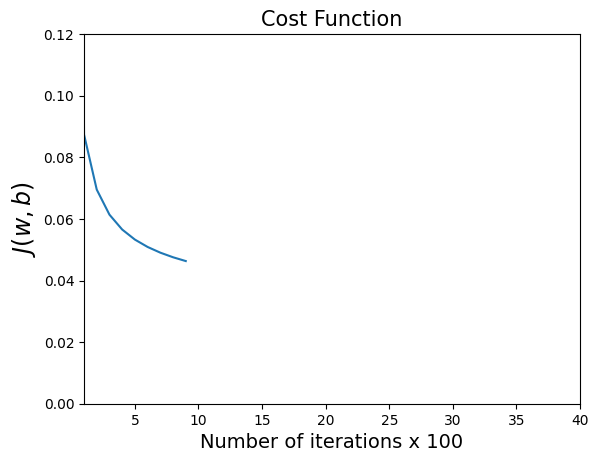

For dataset 7
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.124721
Cost (iteration 200) = 0.104822
Cost (iteration 300) = 0.095407
Cost (iteration 400) = 0.089609
Cost (iteration 500) = 0.085564
Cost (iteration 600) = 0.082527
Cost (iteration 700) = 0.080134
Cost (iteration 800) = 0.078184
Cost (iteration 900) = 0.076552
Accuarcy Test:  97.63333333333334
Accuracy Train:  97.7375


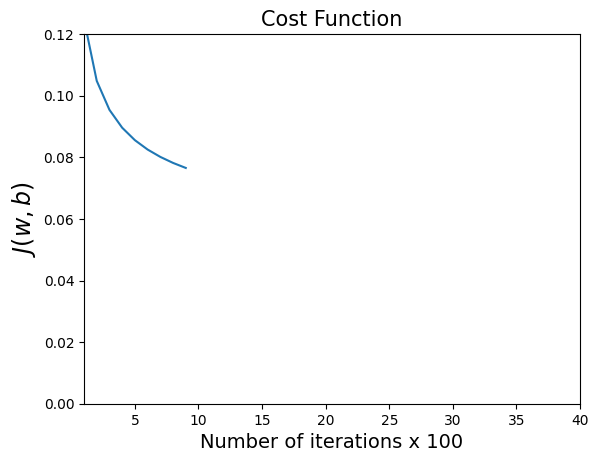

For dataset 8
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.072767
Cost (iteration 200) = 0.053852
Cost (iteration 300) = 0.045417
Cost (iteration 400) = 0.040387
Cost (iteration 500) = 0.036959
Cost (iteration 600) = 0.034434
Cost (iteration 700) = 0.032475
Cost (iteration 800) = 0.030898
Cost (iteration 900) = 0.029592
Accuarcy Test:  99.31666666666666
Accuracy Train:  99.25


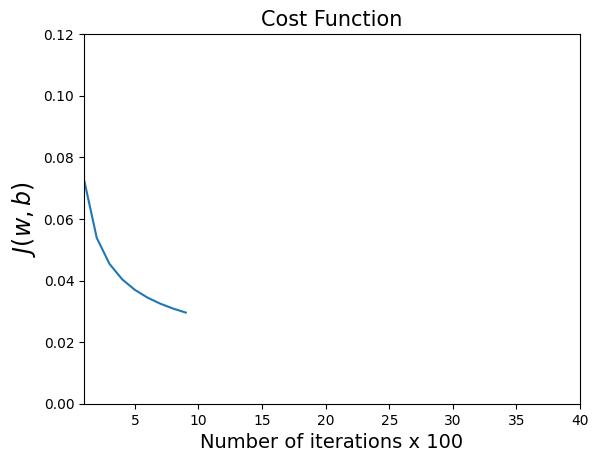

For dataset 9
Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.071091
Cost (iteration 200) = 0.052735
Cost (iteration 300) = 0.044974
Cost (iteration 400) = 0.040484
Cost (iteration 500) = 0.037483
Cost (iteration 600) = 0.035296
Cost (iteration 700) = 0.033611
Cost (iteration 800) = 0.032258
Cost (iteration 900) = 0.031139
Accuarcy Test:  99.21666666666667
Accuracy Train:  99.29583333333333


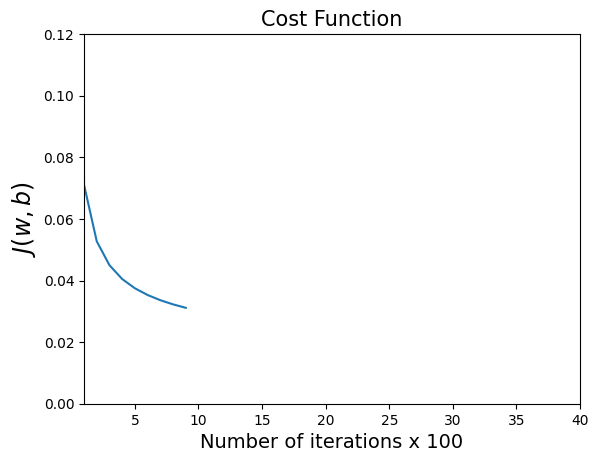

In [141]:
for i in range(10):
  x0=TrainTest_datadict['D'+str(i)][0]
  y0=TrainTest_datadict['D'+str(i)][1]
  y0 = y0.T

  train_proportion = 0.8
  train_test_cut = int(len(x0)*train_proportion)

  X_train, X_test, y_train, y_test = \
      x0[:train_test_cut], \
      x0[train_test_cut:], \
      y0[:train_test_cut], \
      y0[train_test_cut:]

  X_train_normalised = X_train/255.0
  X_test_normalised = X_test/255.0

  X_train_tr = X_train_normalised.transpose()
  y_train_tr = y_train.reshape(1,y_train.shape[0])
  X_test_tr = X_test_normalised.transpose()
  y_test_tr = y_test.reshape(1,y_test.shape[0])

  dim_train = X_train_tr.shape[1]
  dim_test = X_test_tr.shape[1]

  print(f"For dataset {i}")
  d,test_accuracy = model (X_train_tr,
            y_train_tr,
            X_test_tr,
            y_test_tr,
            num_iterations = 1000,
            alpha = 0.2,
            print_cost = True)

  models_list.append(d)
  accuracy_list.append(test_accuracy)

  plt.plot(d["costs"])
  plt.xlim([1,40])
  plt.ylim([0,0.12])
  plt.title("Cost Function",fontsize = 15)
  plt.xlabel("Number of iterations x 100", fontsize = 14)
  plt.ylabel("$J(w,b)$", fontsize = 17)
  plt.show()

In [29]:
one_vs_all_accuracy=np.mean(accuracy_list)
print('The accuracy of the One-Vs-All model is:', one_vs_all_accuracy)

The accuracy of the One-Vs-All model is: 98.73833333333334


In [84]:
x0=TrainTest_datadict['D0'][0]
y0=TrainTest_datadict['D0'][1]
y = y0.T

In [85]:
y.shape

(1, 30000)

In [65]:
models_list[i]['w']

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-1.41272324e-04],
       [-2.72132730e-04],
       [-4.87732433e-04],
       [-1.25568791e-03],
       [-1.45973941e-03],
       [-2.17311653e-03],
       [-3.12801987e-03],
       [-1.19675466e-03],
       [-3.20827384e-04],
       [-7.22077900e-05],
       [-3.44293558e-05],
       [-5.48731975e-05],
       [-1.14924614e-03],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [-3.48391714e-04],
       [-1.12194884e-03],
       [-1.70182698e-03],
       [-5.38053603e-03],
       [-1.1

In [68]:
x_total= train.iloc[:, range(1,785)].values
y_total=train.iloc[:, 0].values

In [69]:
x_total

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [70]:
x_total_normalized = x_total/255.0

In [71]:
train_proportion = 0.8
train_test_cut = int(len(x_total)*train_proportion)

X_train_total, X_test_total, y_train_total, y_test_total = \
      x_total_normalized[:train_test_cut], \
      x_total_normalized[train_test_cut:], \
      y_total[:train_test_cut], \
      y_total[train_test_cut:]

In [72]:
X_train_tr = X_train_total.transpose()
X_test_total_tr = X_test_total.transpose()

In [87]:
X_test_total_tr.shape

(784, 6000)

In [105]:
y_test_total.shape

(6000,)

In [88]:
x_total

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_total

array([0, 8, 1, ..., 9, 3, 9])

In [ ]:
x_total.shape

(30000, 784)

In [ ]:
y_total.shape

(30000,)

In [ ]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y_total == i), "times")

digit 0 appear 2979 times
digit 1 appear 3002 times
digit 2 appear 2928 times
digit 3 appear 2993 times
digit 4 appear 3118 times
digit 5 appear 3018 times
digit 6 appear 3094 times
digit 7 appear 2942 times
digit 8 appear 2936 times
digit 9 appear 2990 times


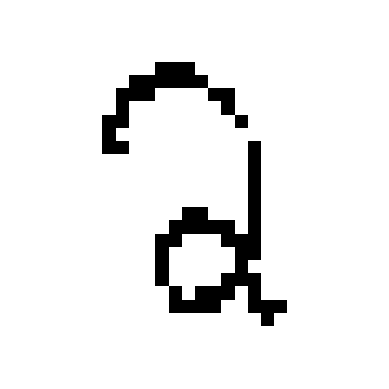

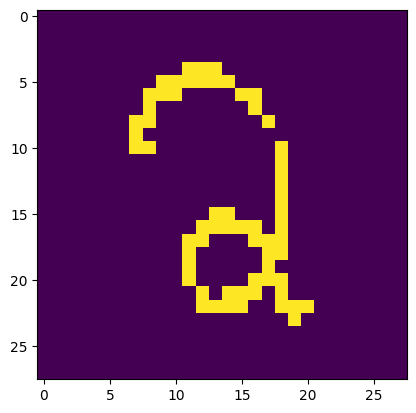

In [ ]:
def plot_digit(number):

    pixels = number.reshape(28,28)

    plt.imshow(pixels, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

    plt.imshow(pixels)

plot_digit(x_total[840])

In [ ]:
y_total[840]

3

In [82]:
a,b = X_test_total_tr.shape
b

6000

In [83]:
a

784

In [138]:
def one_vs_all(x,models_list):
  n=len(models_list)
  a,b = x.shape
  pred_matrix = np.zeros((b,n))
  for i in range(len(models_list)):
    w = models_list[i]['w']
    b = models_list[i]['b']
    y_cap = predict(w,b,x)
    c,d = y_cap.shape
    y_cap_tr = y_cap.reshape(d,y_cap.shape[0])

    pred_matrix[:,i]= y_cap

  max_prob_vec= np.amax(pred_matrix,axis=1,keepdims=True)
  pred_matrix_max_prob = (pred_matrix == max_prob_vec).astype(int)
  labels=[]
  for j in range(pred_matrix_max_prob.shape[0]):
    id = np.where(pred_matrix_max_prob[j,:]==1)
    labels.append(id[0])
  # labels = np.vstack(labels).flatten()

  return labels

https://numpy.org/doc/stable/reference/generated/numpy.where.html

https://numpy.org/doc/stable/reference/generated/numpy.amax.html

https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

In [142]:
examples_number = 6
index_random_sample = np.random.randint(30000, size=(1,examples_number))
example = x_total_normalized[index_random_sample].reshape(examples_number ,784)
true_labels = y_total[index_random_sample].flatten().astype(int)
label = one_vs_all(example.T, models_list)

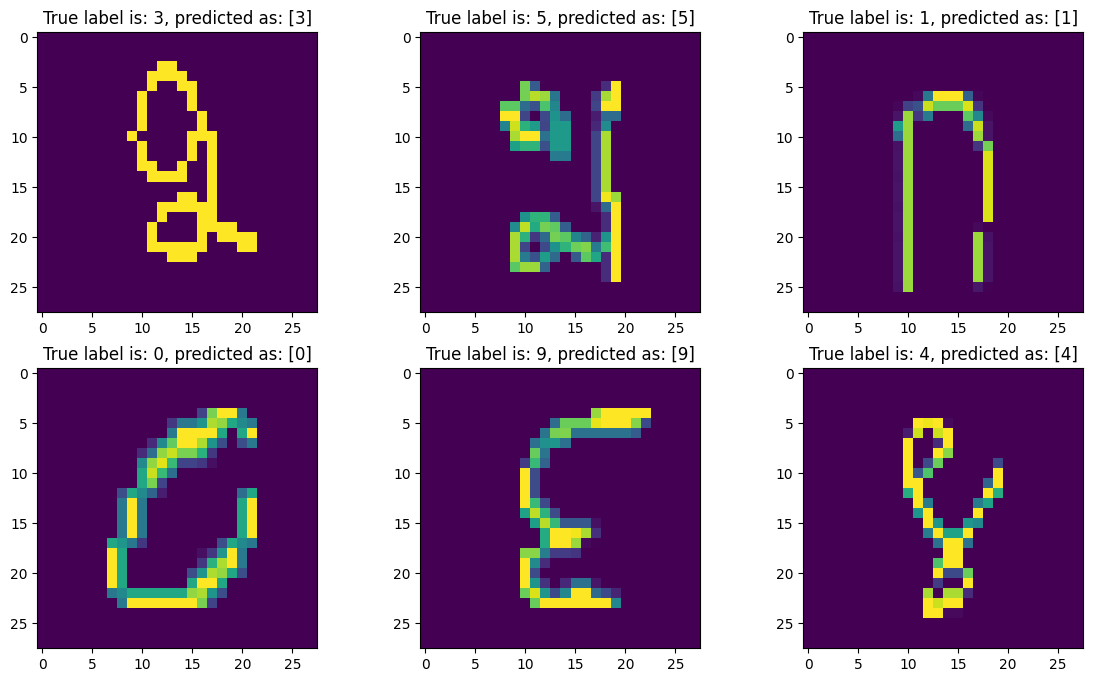

In [143]:
plt.figure(figsize=(14,8))
for i in range(examples_number):
    image = example[i].reshape(28,28)
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    title = f"True label is: {true_labels[i]}, predicted as: {label[i]}"
    plt.title(title)

# Model 2 Source Code

In [ ]:
x1=TrainTest_datadict['D0'][0]
x1.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y1=TrainTest_datadict['D0'][1]
y1 = y1.T
print(y1)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
train_proportion = 0.8
train_test_cut = int(len(x1)*train_proportion)

X_train, X_test, y_train, y_test = \
    x1[:train_test_cut], \
    x1[train_test_cut:], \
    y1[:train_test_cut], \
    y1[train_test_cut:]

print("Shape of X_train is", X_train.shape)
print("Shape of X_test is", X_test.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of y_test is", y_test.shape)

X_train_normalised = X_train/255.0
X_test_normalised = X_test/255.0

Shape of X_train is (24000, 784)
Shape of X_test is (6000, 784)
Shape of y_train is (24000, 1)
Shape of y_test is (6000, 1)


In [ ]:
print(y_test)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
m,n = y_test.shape

In [ ]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])
X_test_tr = X_test_normalised.transpose()
y_test_tr = y_test.reshape(1,y_test.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)
print(X_test_tr.shape)
print(y_test_tr.shape)

dim_train = X_train_tr.shape[1]
dim_test = X_test_tr.shape[1]

print("The training dataset has dimensions equal to", dim_train)
print("The test set has dimensions equal to", dim_test)

(784, 24000)
(1, 24000)
(784, 6000)
(1, 6000)
The training dataset has dimensions equal to 24000
The test set has dimensions equal to 6000


In [ ]:
def sigmoid(z):
    """
    Implement the sigmoid function

    Arguments:
    y -- a scalar (float)

    Return:
    s -- the sigmoid function evaluated on z (as in equation (1))
    """
    s = 1.0 / (1.0 + np.exp(-z))

    return s
def initialize(dim):
    """
    Initialise the weights and the bias to tensors of dimensions (dim,1) for w and
    to 1 for b (a scalar)

    Arguments:
    dim -- a scalar (float)

    Return:
    w -- a matrix of dimensions (dim,1) containing all zero
    b -- a scalar = 0
    """
    w = np.zeros((dim,1))
    b = 0

    assert (w.shape == (dim,1))
    assert (isinstance(b, float) or isinstance(b,int))

    return w,b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px, 1) (our case 784,1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px, number of examples)
    Y -- true "label" vector (containing 0 if class 1, 1 if class 2) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]

    z = np.dot(w.T,X)+b
    A = sigmoid(z)
    cost = -1.0/m*np.sum(Y*np.log(A)+(1.0-Y)*np.log(1.0-A))

    dw = 1.0/m*np.dot(X, (A-Y).T)
    db = 1.0/m*np.sum(A-Y)

    assert (dw.shape == w.shape)
    assert (db.dtype == float)

    cost = np.squeeze(cost)
    assert (cost.shape == ())

    grads = {"dw": dw,
             "db":db}

    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of shape (n_x, m)
    Y -- true "label" vector (containing 0 if class 1, 1 if class 2), of shape (1, m)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate*dw
        b = b - learning_rate*db

        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Cost (iteration %i) = %f" %(i, cost))

    grads = {"dw": dw, "db": db}
    params = {"w": w, "b": b}

    return params, grads, costs

def predict (w, b, X):
    '''
    Predict whether the label is 0 or 1

    Arguments:
    w -- weights, a numpy array of size (n_x, 1)
    b -- bias, a scalar
    X -- data of size (n_x, m)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1)
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)

    A = sigmoid (np.dot(w.T, X)+b)

    for i in range(A.shape[1]):
        if (A[:,i] > 0.5):
            Y_prediction[:, i] = 1
        elif (A[:,i] <= 0.5):
            Y_prediction[:, i] = 0

    assert (Y_prediction.shape == (1,m))

    return Y_prediction


def model (X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):

    w, b = initialize(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]

    Y_prediction_test = predict (w, b, X_test)
    Y_prediction_train = predict (w, b, X_train)

    train_accuracy = 100.0 - np.mean(np.abs(Y_prediction_train-Y_train)*100.0)
    test_accuracy = 100.0 - np.mean(np.abs(Y_prediction_test-Y_test)*100.0)

    d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    print ("Accuarcy Test: ",  test_accuracy)
    print ("Accuracy Train: ", train_accuracy)

    return d

In [ ]:
d = model (X_train_tr,
           y_train_tr,
           X_test_tr,
           y_test_tr,
           num_iterations = 4000,
           learning_rate = 0.05,
           print_cost = True)

Cost (iteration 0) = 0.693147
Cost (iteration 100) = 0.180865
Cost (iteration 200) = 0.137785
Cost (iteration 300) = 0.118199


KeyboardInterrupt: 

# Failed Model 1

10 datasets for 10 digits

In [ ]:
D0=train.copy();D1=train.copy();D2=train.copy();D3=train.copy();D4=train.copy();D5=train.copy();D6=train.copy();D7=train.copy();D8=train.copy();D9=train.copy();


In [ ]:
datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

The required digit turns into 1 rest turns into 0

One-Hot Encoding

In [ ]:
for i in range(10):
  datasets[i]['Target'] = (datasets[i]['label'] == i).astype(int)
  datasets[i].drop(columns=['label'], inplace=True)

In [ ]:
datasets[7].head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
TrainTest_datadict={}

for i in range(10):
  x=datasets[i].iloc[:,:784]
  x=x.T
  x=x/255.0
  y=datasets[i].iloc[:,-1]
  y=np.array([y])
  TrainTest_datadict['D'+str(i)]=[x,y]

In [ ]:
iterations = 100000
alpha = 0.1
m=30000

In [ ]:
def normalize_features(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x, mean, std_dev

In [ ]:
def sigmoid(z):

    g = 1/ (1 + np.exp(-z))

    return g

In [ ]:
def cost_function(x, y, w, b,costfunc_values,k):

    z = np.dot(w,x) + b
    f = sigmoid(z)

    total_cost =  1/m*(-1*(np.sum(y*np.log(f) + (1-y)*np.log(1-f))))
    costfunc_values.append(total_cost)

    k+=1

    return total_cost,costfunc_values,k

In [ ]:
def cross_entropy(x, y, w, b, costfunc_values, k, epsilon=1e-8):
    z = np.dot(w, x) + b
    f = sigmoid(z)

    f = np.clip(f, epsilon, 1 - epsilon)

    total_cost = 1/m * (-1*(np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))))
    costfunc_values.append(total_cost)

    k += 1

    return total_cost, costfunc_values, k


https://community.deeplearning.ai/t/logistic-loss-function-divide-by-zero-encountered-in-log/192184/4

In [ ]:
def gradient_function(x, y, w, b):

    z = np.dot(w,x) + b
    f = sigmoid(z)
    dif = f - y
    dj_dw = np.dot(dif,x.T) / m
    dj_db = np.sum(dif) / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        return w_in, b_in

In [ ]:
x1=TrainTest_datadict['D0'][0]
x1 =x1/255.0
x1.head()


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
pixel0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pixel4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cost_value=[]
trained_parameters=[]

In [ ]:
for sets in range(10):
  x=TrainTest_datadict['D'+str(sets)][0]
  y=TrainTest_datadict['D'+str(sets)][1]
  w=np.random.randn(1,784)
  b=0.0
  costfunc_values = []
  k = 0

  print(f"For dataset {sets}")

  cost,costfunc_values,k = cost_function(x, y, w, b,costfunc_values,k)
  dw,db= gradient_function(x, y, w, b)
  w,b=gradient_descent(x, y, w, b, alpha)

  if i%2000 == 0:
      print('running @ ',cost)
      if i%2 == 0:
        if abs(cost-costfunc_values[-2])<0.000001:
          if abs(cost-costfunc_values[-3])<0.000001:
            break

  cost_value.append(costfunc_values)
  trained_parameters.append([w,b])
  print(f"{k} Iterations")

For dataset 0
1 Iterations
For dataset 1
1 Iterations
For dataset 2
1 Iterations
For dataset 3
1 Iterations
For dataset 4
1 Iterations
For dataset 5
1 Iterations
For dataset 6
1 Iterations
For dataset 7


<ipython-input-11-70652a5c111a>:6: RuntimeWarning: divide by zero encountered in log
  total_cost =  1/m*(-1*(np.sum(y*np.log(f) + (1-y)*np.log(1-f))))


1 Iterations
For dataset 8
1 Iterations
For dataset 9
1 Iterations


# Source Code Model 1

In [ ]:
!pip install gdown
!gdown --id 1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1xIYCrCOo3cPIgslEzI11_cQ_2QFROTHv
To: /content/data.csv
100% 20.4M/20.4M [00:00<00:00, 66.7MB/s]


In [ ]:
data = pd.read_csv('/content/data.csv',header=None)

In [ ]:
D0 = data.copy();D1 = data.copy();D2 = data.copy();D3 = data.copy();D4 = data.copy();D5 =data.copy();D6 = data.copy();D7 = data.copy();D8 = data.copy();D9 = data.copy()



datasets = [D0,D1,D2,D3,D4,D5,D6,D7,D8,D9]

In [ ]:
 for i in range(10):
  for j in range(5000):
    if datasets[i].at[j,400] == i:
      datasets[i].at[j,400] = 1
    else:
      datasets[i].at[j,400] = 0

In [ ]:
#TrainTest_datadict['key'][0] ==> X && TrainTest_datadict['key'][1] ==> y
TrainTest_datadict = {}
 #399 --> X 400 --> y
for i in range(10):
  X = datasets[i].iloc[:,:400]
  X = X.T
  y = datasets[i].iloc[:,-1]
  y = np.array([y])
  TrainTest_datadict['D'+str(i)] = [X,y]

In [ ]:
itterations = 10000000   #random big value
alpha = 0.160
m = 5000
cost_values = []
trained_parameters = []

for trainsets in range(10):
  X = TrainTest_datadict['D'+str(trainsets)][0]
  y = TrainTest_datadict['D'+str(trainsets)][1]
  weights = np.random.randn(1,400)
  bias = 0
  costfunc_values = []
  k = 0
  print('Training for dataset '+str(trainsets))
  for i in range(1,itterations+1):
    #logistic function
    z = np.dot(weights,X) + bias
    hypothesis = 1/(1 + np.exp(-z))

    #cost function
    j = 1/m*(-1*(np.sum(y*np.log(hypothesis) + (1-y)*np.log(1-hypothesis))))
    costfunc_values.append(j)
    k+=1

    #gradient decent
    dw =  1/m * np.dot(hypothesis-y,X.T)
    db =  1/m * np.sum(hypothesis-y)
    weights = weights - alpha*dw
    bias = bias - alpha*db

    #stop training
    if i%2000 == 0:
      print('running @ ',j)
    if i%2 == 0:
      if abs(j-costfunc_values[-2])<0.000001:
        if abs(j-costfunc_values[-3])<0.000001:
          break
  cost_values.append(costfunc_values)
  trained_parameters.append([weights,bias])
  print('itteration number:',k)

Training for dataset 0
running @  0.043115189985264056
running @  0.03026538588462469
running @  0.02489707244201688
running @  0.021708642724634714
running @  0.019501519526667697
running @  0.017854742480467038
running @  0.01657620308655347
itteration number: 15156
Training for dataset 1
running @  0.03724141282643543
running @  0.033072007789028066
running @  0.030583662538278395
running @  0.028718223563997544
running @  0.027212981024548315
running @  0.0259507069632008
running @  0.024865025356678252
itteration number: 14196
Training for dataset 2
running @  0.09968952743658065
running @  0.08170526914576719
running @  0.0745009396572521
running @  0.07057970412201393
running @  0.06798428593575001
running @  0.06604961160593097
running @  0.06450112613959477
running @  0.06320637846615822


KeyboardInterrupt: 